### GDAA 2010 Project 1 - Regression Analysis

Submitted By: Tiana Gallo

Submitted To: Dr. Steven Edwards

Due Date: April 2, 2024

The dataset I chose contains information compiled by the World Health Organization and the United Nations to track factors that affect life expectancy. The key question I am trying to answer is "What are the predicting variables actually affecting life expectancy?" The target variable will be Life Expectancy, and I will choose multiple numeric variables to be the predictors. First I brought in the dataset into my python notebook and used the head function to get a sense of understanding about the data.

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler

file_path = "C:\GDAA2000\Machine Learning Basics\data\Life_Expectancy_Data.csv"
df = pd.read_csv(file_path)

df.head()

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.0               8.16         65.0        0.1  584.259210  33736494.0   
1   58.0               8.18         62.0        0.1  612.696514    327582.0   
2   62.0               8.13         64.0        0.1  631.744976  31731688.0   
3   67.0               8.52         67.0        0.1  669.959000   3696958.0   
4   68.0               7.87         68.0        0.1   63.537231   2978599.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5  

[5 rows x 22 columns]

This dataset has health factors for 193 countries that has been collected from the same WHO data repository website and its corresponding economic data was collected from United Nations website. The data in this project considers data from 2000 - 2015. The Adult Mortality Rate is the probability of dying between 15 and 60 years per 1000 population. The number of infant deaths is per 1000 population. Alcohol was recorded per capita consumption in litres. Expenditure on health as a percentage of GDP per capita as well as HepB immunization are both in percent. The Measels column is the number of reported cases per 1000 population. 

#### Data Preprocessing

First, we will conduct some data preprocessing to impute missing data, trim outliers, rescale the data and remove and unecessary variables. Data preprocessing plays a crucial role in ensuring tht the input data is clean, consistent and suitable for anaysis in orer to enahnce accuracy and interpretability of regression models. 

By using the 'head' function, we can see there are 22 columns in this dataset. Let's get a little more information with regards to the predictors.

In [2]:
df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In order to preprocess the data, I determined the number of missing values (NaN values) in each column in the dataframe. Next, I calculcated the mean values  replaced any missing values with the calculated mean. I renamed the columns as they contained spaces which could interfere with future code. Other than the spaces, the column names were labelled correctly. I also dropped 'Country' and 'Status' as their datatypes were objects as seen from the code chunk above. I also dropped 'thinnes 5 - 9 years', as I felt this was encompassed in the column 'thinness 1 - 19 years'. Some of the predictor names has spaces either at the beginning of their names or at the end, which caused problems throughout the code. I added str.strip to this code chunk to remove any spaces.

In [3]:
df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [4]:
col_with_null_values = ['Life expectancy ', 'Adult Mortality', 'Alcohol', 'Hepatitis B', ' BMI ', 'Polio', 'Total expenditure',
       'Diphtheria ', 'GDP', 'Population',' thinness  1-19 years', ' thinness 5-9 years','Income composition of resources', 'Schooling']
for i in col_with_null_values:
    mean = df[i].mean()
    df[i].fillna(value=mean, inplace = True)

In [5]:
df = df.rename(columns={'Adult Mortality': 'Adult_Mortality', 
                        'Hepatitis B': 'Hepatitis_B',
                        'Total expenditure': 'Total_expenditure',
                        'thinness  1-19 years': 'thinness_1_to_19_yrs',
                        'Income composition of resources' : 'Income_composition_of_resources',
                        'Life expectancy' : 'Life_expectancy'
                       })

df = df.drop(columns=['Country','Status', ' thinness 5-9 years'])

df.columns = df.columns.str.strip()
                   
df.columns


Index(['Year', 'Life expectancy', 'Adult_Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis_B', 'Measles', 'BMI',
       'under-five deaths', 'Polio', 'Total_expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'Income_composition_of_resources', 'Schooling'],
      dtype='object')

The data was rescaled using Standard Scaler to ensure that all predictors have a similar scale, preventing features with larger magnitudes from dominating the learning process. After scaling, the standardized predictor variables are converted back to a DataFrame called 'scaled_df'. The scaled predictor variables are concatenated with the original target variable to ensure that 'Life Expectancy' is included in the DataFrame.

In [6]:
# Separate the target variable and predictors
target = df['Life expectancy']
predictors = df.drop(columns=['Life expectancy'])

# Scale the predictors
scaler = StandardScaler()
scaled_predictors = scaler.fit_transform(predictors)

# Convert the scaled predictors back to a DataFrame
scaled_df = pd.DataFrame(scaled_predictors, columns=predictors.columns)

# Concatenate the scaled predictors with the target variable
scaled_df['Life expectancy'] = target

print(scaled_df.head())
print("Dimensions of the DataFrame:", scaled_df.shape)

       Year  Adult_Mortality  infant deaths   Alcohol  percentage expenditure  \
0  1.621762         0.791586       0.268824 -1.172958               -0.335570   
1  1.404986         0.856072       0.285786 -1.172958               -0.334441   
2  1.188210         0.831890       0.302749 -1.172958               -0.334594   
3  0.971434         0.864132       0.328193 -1.172958               -0.332096   
4  0.754658         0.888314       0.345155 -1.172958               -0.367862   

   Hepatitis_B   Measles       BMI  under-five deaths     Polio  \
0    -0.705861 -0.110384 -0.964715           0.255359 -3.278638   
1    -0.838704 -0.168124 -0.989810           0.274060 -1.051482   
2    -0.750142 -0.173531 -1.014905           0.292761 -0.880163   
3    -0.617299  0.032045 -1.040000           0.317696 -0.666013   
4    -0.573018  0.051757 -1.060076           0.342631 -0.623183   

   Total_expenditure  Diphtheria  HIV/AIDS       GDP  Population  \
0           0.925806   -0.732952 -0.323445

Once scaling was completed, I wanted to quickly visualize the distribution of the target variable. The outcome is what I expected where the most frequent life expectancy age is between 70 to 80 years of age.

Text(0.5, 0, 'Life Expectancy')

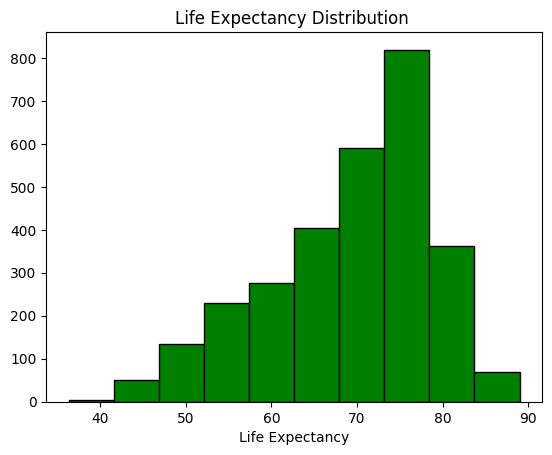

In [7]:
plt.hist(scaled_df["Life expectancy"], color= 'green', edgecolor = 'black')
plt.title("Life Expectancy Distribution ")
plt.xlabel("Life Expectancy")

#### Exploratory Data Analysis

Now, we will conduct some exploratory data analysis to summerize some main charactertics of the dataset and employ visual methods. The primary goal of EDA is to compehend what the data is representing and is a crucial step before moving on to modelling. As part of EDA, I included a scatter plot matrix seen below, but it is very difficult to read. We can explore different avenues to better visualize relationships within the data. 

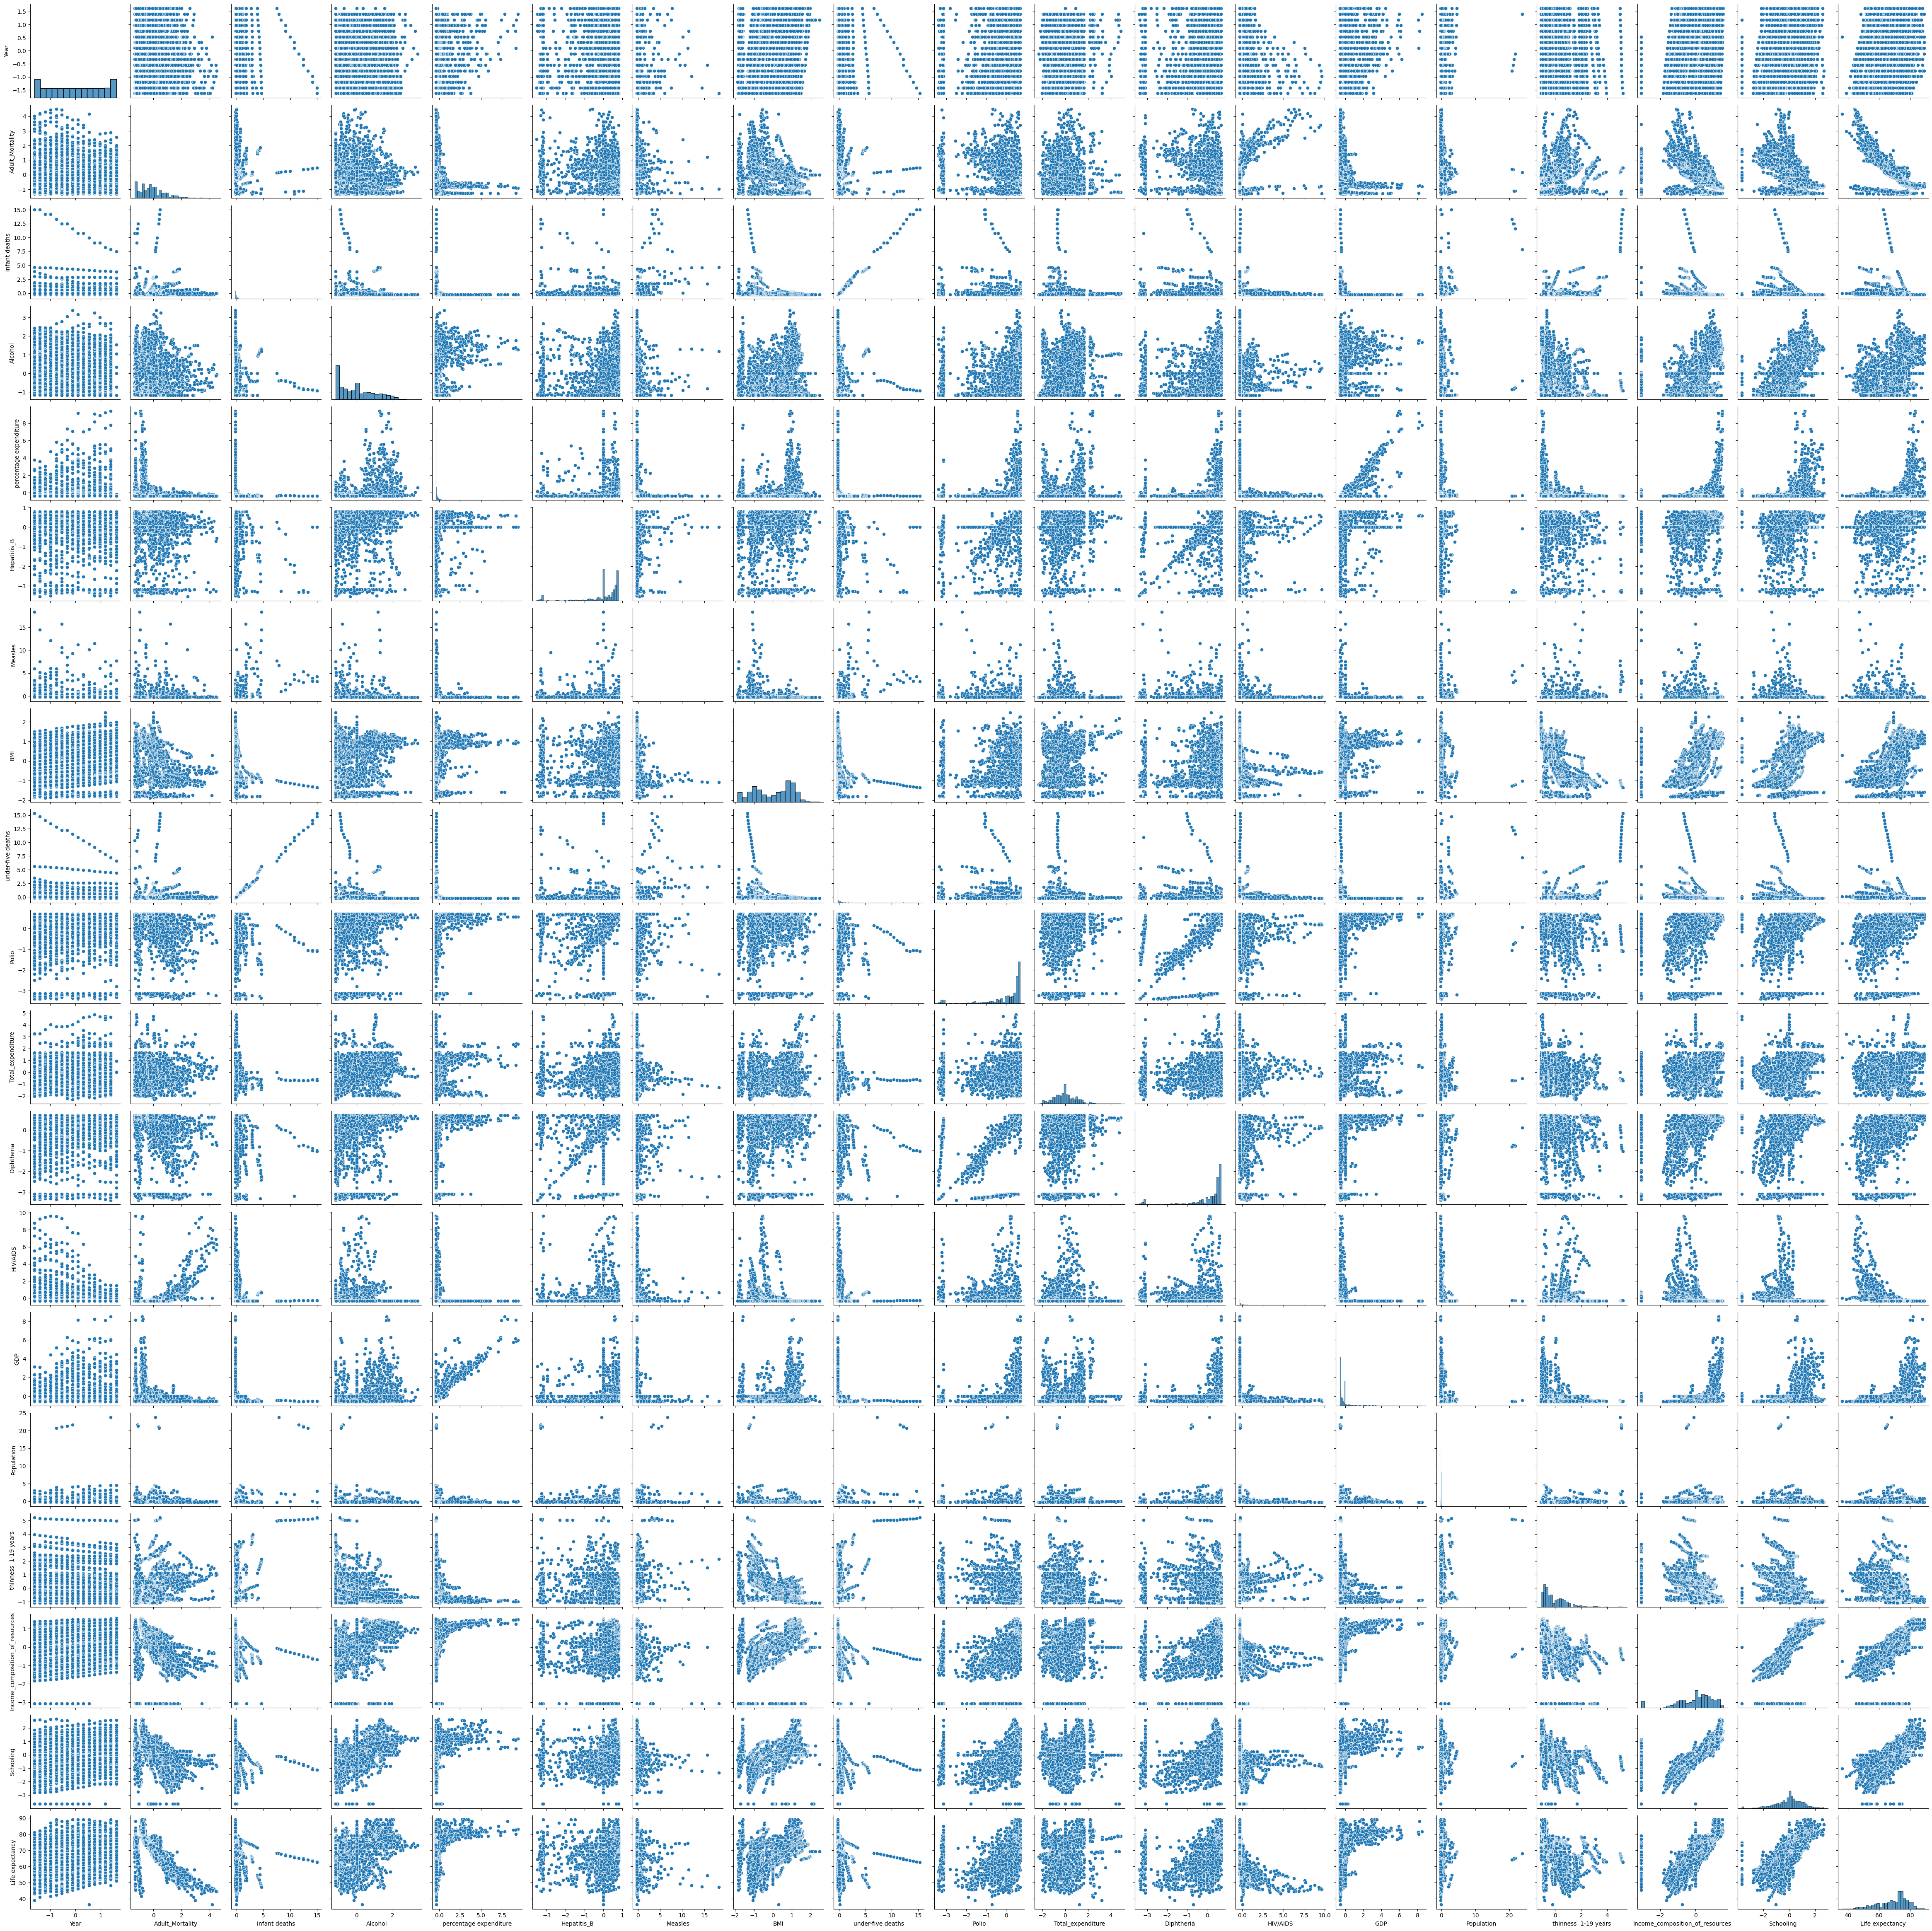

In [8]:
sns.pairplot(scaled_df)
plt.show()

Since the scatter plot matrix wasn't represented well, let's better visualize the relationship between variables in the dataset by using a heatmap! Strong positive correlations will have values close to 1, and strong negative correlations will have values close to -1. A lack of correlation will have values close to 0. This heatmap will help to identify patterns in the data and detect and multicollinearity. This is also a quick way to identify any missing values as well. 

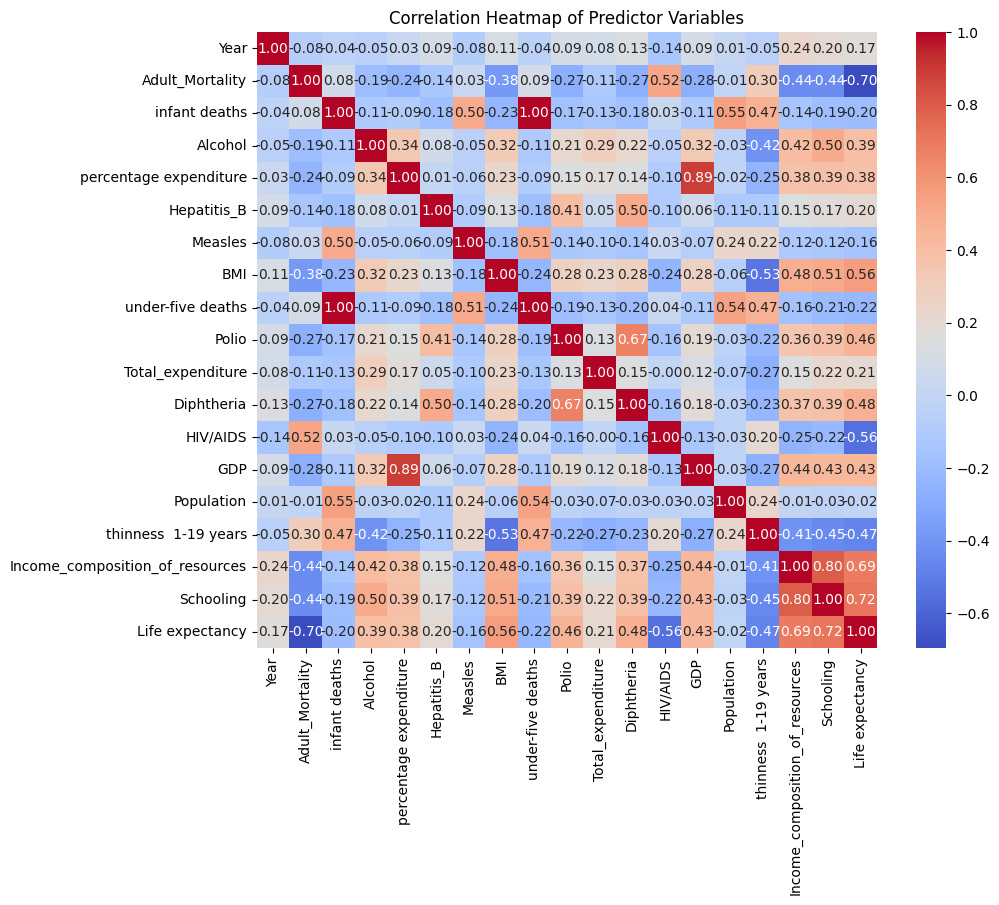

In [9]:
corr_matrix = scaled_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Heatmap of Predictor Variables')
plt.show()

**Exploring Variable Distributions:**

Two predictors that have the highest correlation coefficients to my target variable are "Income Composition of Resources" and "Schooling". I will plot histograms of both below to visualize their distributions. Income Composition of Resources (ICOR) measures how good a country is at utilizing its resources and grades them between 0 to 1. The higher ICOR indicates optmal utilization of available resources. ICOR has a strong positive impact on life expectancy as someone living in a developed country with a higher GDP, their life expectancy is expected to be relatively higher compared to someone living in a developing country. Schooling has a positive impact on life expectancy as well as people with higher level of education generally have a higher income and are expected to spend a greater portion of thier lives in good health. 

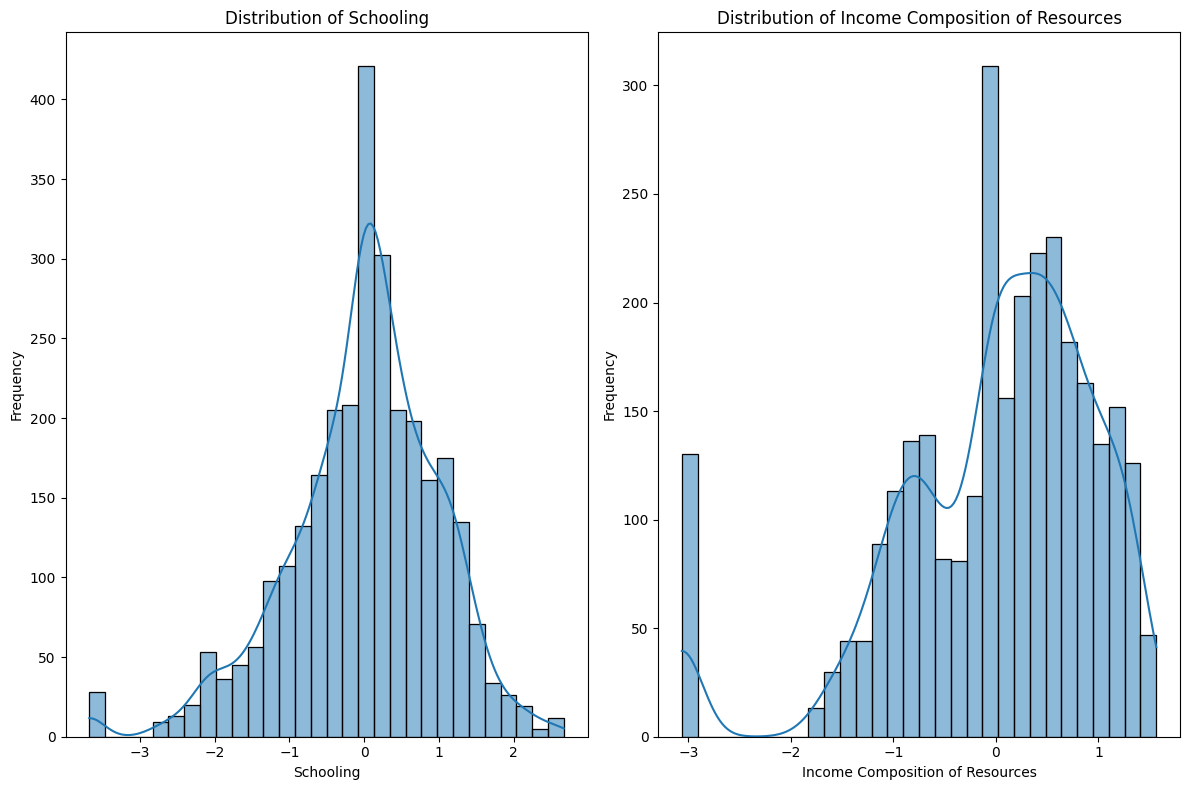

In [10]:
num_bins = 30

# Create a figure and axes object
fig, axes = plt.subplots(1, 2, figsize=(12, 8))

# Plot histograms
sns.histplot(scaled_df['Schooling'], bins=num_bins, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Schooling')
axes[0].set_xlabel('Schooling')
axes[0].set_ylabel('Frequency')

sns.histplot(scaled_df['Income_composition_of_resources'], bins=num_bins, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Income Composition of Resources')
axes[1].set_xlabel('Income Composition of Resources')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

As seen in both histograms, there are outliers close to the -3 values. This could be to missing data for some countries. I will trim the outliers from the data. First we will apply this to the 'Schooling' variable, and secondly to the 'Income Composition of Resources' variable

        Year  Adult_Mortality  infant deaths   Alcohol  \
14 -1.413102         1.218802       0.489338 -1.172958   
16  1.621762        -0.731880      -0.257017 -0.000731   
18  1.188210        -0.651273      -0.257017  0.040131   
20  0.754658        -0.619031      -0.257017  0.195918   
21  0.537882        -0.594849      -0.248536  0.172933   

    percentage expenditure  Hepatitis_B   Measles       BMI  \
14               -0.366112    -0.794423  0.553182 -1.290950   
16               -0.187805     0.799696 -0.211036  0.987677   
18               -0.154648     0.799696 -0.211036  0.912392   
20               -0.151536     0.799696 -0.208594  0.842126   
21               -0.350391     0.799696 -0.210164  0.801974   

    under-five deaths     Polio  Total_expenditure  Diphtheria  HIV/AIDS  \
14           0.498474 -2.036570           0.775798   -2.086816 -0.323445   
16          -0.262038  0.704544           0.025756    0.705529 -0.323445   
18          -0.255805  0.704544          -0.

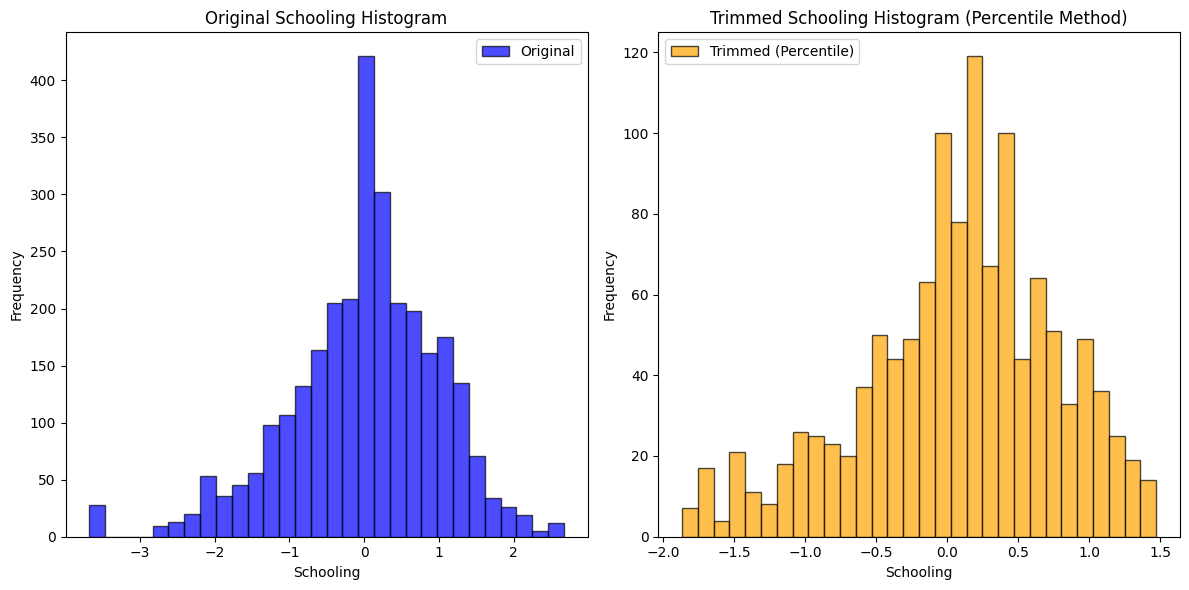

In [11]:
# Specify the percentiles for trimming outliers
lower_percentile = 5
upper_percentile = 95

# Calculate the lower and upper percentile values for each predictor
lower_percentile_values = scaled_df.iloc[:, :-1].apply(lambda x: np.percentile(x.dropna(), lower_percentile))
upper_percentile_values = scaled_df.iloc[:, :-1].apply(lambda x: np.percentile(x.dropna(), upper_percentile))

# Identify rows containing outliers and drop them entirely from the dataset
trimmed_scaled_df_z_percentile = scaled_df.copy()
for col in lower_percentile_values.index:
    is_outlier_lower = trimmed_scaled_df_z_percentile[col] < lower_percentile_values[col]
    is_outlier_upper = trimmed_scaled_df_z_percentile[col] > upper_percentile_values[col]
    outliers_index = is_outlier_lower | is_outlier_upper
    trimmed_scaled_df_z_percentile = trimmed_scaled_df_z_percentile[~outliers_index]

print(trimmed_scaled_df_z_percentile.head())

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Original Food_Avg 
axes[0].hist(scaled_df['Schooling'], bins=30, alpha=0.7, color='blue', label='Original', edgecolor = 'black')
axes[0].set_title('Original Schooling Histogram')
axes[0].set_xlabel('Schooling')
axes[0].set_ylabel('Frequency')
axes[0].legend()

# Trimmed Food_Avg 
axes[1].hist(trimmed_scaled_df_z_percentile['Schooling'], bins=30, alpha=0.7, color='orange', label='Trimmed (Percentile)', edgecolor = 'black')
axes[1].set_title('Trimmed Schooling Histogram (Percentile Method)')
axes[1].set_xlabel('Schooling')
axes[1].set_ylabel('Frequency')
axes[1].legend()

plt.tight_layout()
plt.show()

        Year  Adult_Mortality  infant deaths   Alcohol  \
14 -1.413102         1.218802       0.489338 -1.172958   
16  1.621762        -0.731880      -0.257017 -0.000731   
18  1.188210        -0.651273      -0.257017  0.040131   
20  0.754658        -0.619031      -0.257017  0.195918   
21  0.537882        -0.594849      -0.248536  0.172933   

    percentage expenditure  Hepatitis_B   Measles       BMI  \
14               -0.366112    -0.794423  0.553182 -1.290950   
16               -0.187805     0.799696 -0.211036  0.987677   
18               -0.154648     0.799696 -0.211036  0.912392   
20               -0.151536     0.799696 -0.208594  0.842126   
21               -0.350391     0.799696 -0.210164  0.801974   

    under-five deaths     Polio  Total_expenditure  Diphtheria  HIV/AIDS  \
14           0.498474 -2.036570           0.775798   -2.086816 -0.323445   
16          -0.262038  0.704544           0.025756    0.705529 -0.323445   
18          -0.255805  0.704544          -0.

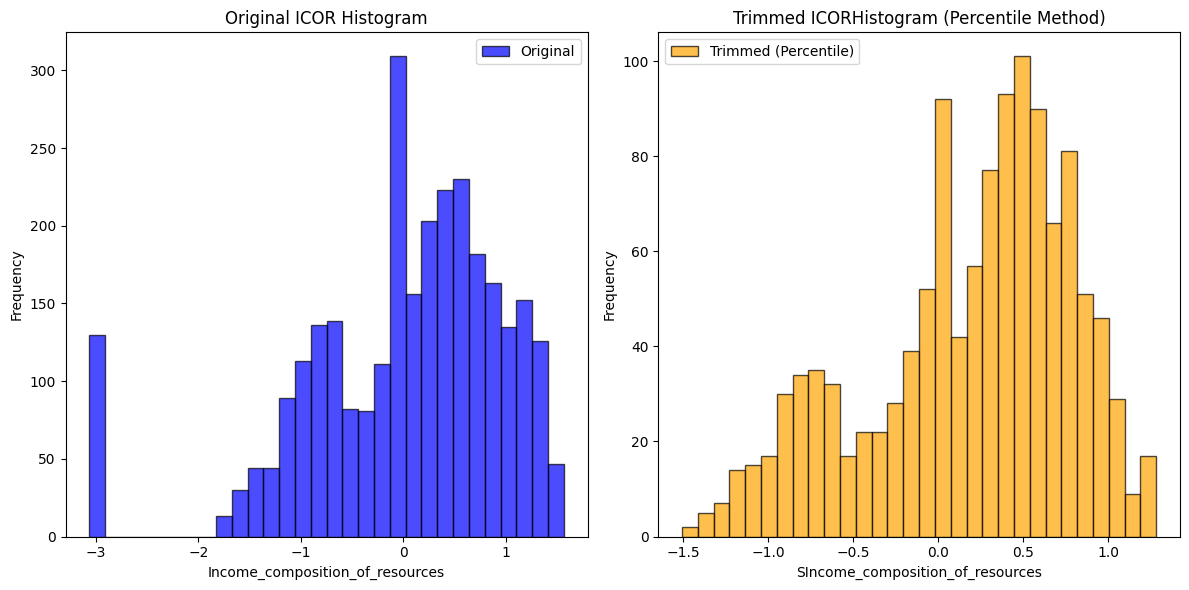

In [12]:
# Specify the percentiles for trimming outliers
lower_percentile = 5
upper_percentile = 95

# Calculate the lower and upper percentile values for each predictor
lower_percentile_values = scaled_df.iloc[:, :-1].apply(lambda x: np.percentile(x.dropna(), lower_percentile))
upper_percentile_values = scaled_df.iloc[:, :-1].apply(lambda x: np.percentile(x.dropna(), upper_percentile))

# Identify rows containing outliers and drop them entirely from the dataset
trimmed_scaled_df_z_percentile = scaled_df.copy()
for col in lower_percentile_values.index:
    is_outlier_lower = trimmed_scaled_df_z_percentile[col] < lower_percentile_values[col]
    is_outlier_upper = trimmed_scaled_df_z_percentile[col] > upper_percentile_values[col]
    outliers_index = is_outlier_lower | is_outlier_upper
    trimmed_scaled_df_z_percentile = trimmed_scaled_df_z_percentile[~outliers_index]

print(trimmed_scaled_df_z_percentile.head())

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Original Food_Avg 
axes[0].hist(scaled_df['Income_composition_of_resources'], bins=30, alpha=0.7, color='blue', label='Original', edgecolor = 'black')
axes[0].set_title('Original ICOR Histogram')
axes[0].set_xlabel('Income_composition_of_resources')
axes[0].set_ylabel('Frequency')
axes[0].legend()

# Trimmed Food_Avg 
axes[1].hist(trimmed_scaled_df_z_percentile['Income_composition_of_resources'], bins=30, alpha=0.7, color='orange', label='Trimmed (Percentile)', edgecolor = 'black')
axes[1].set_title('Trimmed ICORHistogram (Percentile Method)')
axes[1].set_xlabel('SIncome_composition_of_resources')
axes[1].set_ylabel('Frequency')
axes[1].legend()

plt.tight_layout()
plt.show()

After trimming the outliers, we can compare the before and after histograms, and see that the distributions of both Schooling and Income Composition of Resources are relatively normally distributed.

### Feature Engineering

**Data Augmentation** - the code chunk below augments the predictor variables with polynomial features up to the second deree and prepares the data for regression analysis with enhanced feature representation. The code will print the first few rows of the augmented DataFrame ('df_augmented').

In [13]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd

# Define the polynomial features transformer
poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)

# Select the predictor variables (excluding 'Life expectancy')
predictors = df.drop(columns=['Life expectancy'])

# Handle missing values (NaNs) by imputing with the mean of each column
imputer = SimpleImputer(strategy='mean')
predictors_imputed = imputer.fit_transform(predictors)

# Fit and transform the predictors to create polynomial features
X_poly = poly.fit_transform(predictors_imputed)

# Generate the new feature names
feature_names = poly.get_feature_names_out(predictors.columns)

# Create a DataFrame from the polynomial features
X_poly_df = pd.DataFrame(X_poly, columns=feature_names)

# Concatenate the original 'Life expectancy' column with the new polynomial features DataFrame
df_augmented = pd.concat([scaled_df[['Life expectancy']], X_poly_df], axis=1)

# Print a preview of the augmented DataFrame
print(df_augmented.head())

# Print dimensions of the new DataFrame
print("Dimensions of the new DataFrame:", df_augmented.shape)

   Life expectancy    Year  Adult_Mortality  infant deaths  Alcohol  \
0             65.0  2015.0            263.0           62.0     0.01   
1             59.9  2014.0            271.0           64.0     0.01   
2             59.9  2013.0            268.0           66.0     0.01   
3             59.5  2012.0            272.0           69.0     0.01   
4             59.2  2011.0            275.0           71.0     0.01   

   percentage expenditure  Hepatitis_B  Measles   BMI  under-five deaths  ...  \
0               71.279624         65.0   1154.0  19.1               83.0  ...   
1               73.523582         62.0    492.0  18.6               86.0  ...   
2               73.219243         64.0    430.0  18.1               89.0  ...   
3               78.184215         67.0   2787.0  17.6               93.0  ...   
4                7.097109         68.0   3013.0  17.2               97.0  ...   

   Population^2  Population thinness  1-19 years  \
0  1.138151e+15                   

**Principal Component Analysis** - the next code chunk performs PCA on the augmented DataFrame (df_augmented) with polynomial features. PCA is a dimensionality reduction technique that reduces the number of predictors while preserving most of the information in the data. It transforms the original predictors into a new set of orthogonal variables called principal components. The class name 'pca' is created with the parameter 'n_componenets = 0.95' indicating that PCA should retain 95% of the variance in the data. A new DataFrame was was created from the reduced-dimensional PCA results and was then concatenated with the original 'Life expectancy' column from the augmented DataFrame. The first few rows and dimensions of the PCA augmented DataFrame will be printed and a scatter plot is also created to visualize the relationship between the first principal component and the target variable.

   Life expectancy         pca_0
0             65.0 -1.919616e+15
1             59.9 -3.057660e+15
2             59.9 -2.050867e+15
3             59.5 -3.044099e+15
4             59.2 -3.048895e+15
Dimensions of the new DataFrame: (2938, 2)


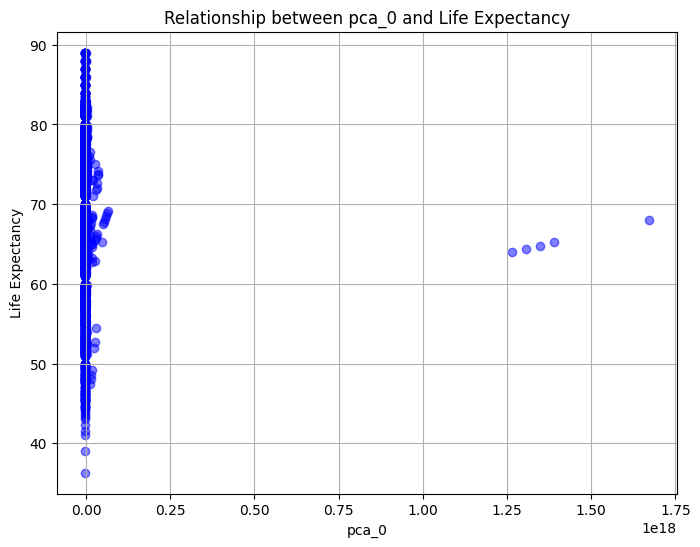

In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)

# Select the features 
PCAfeatures = df_augmented.drop(columns=['Life expectancy'])

# Fit and transform the features to reduce dimensions
X_pca = pca.fit_transform(PCAfeatures)

# Create a DataFrame from the PCA results
df_augmented_pca = pd.DataFrame(X_pca, columns=[f'pca_{i}' for i in range(X_pca.shape[1])])

# Concatenate the target column with the new PCA features DataFrame
df_augmented_pca = pd.concat([df_augmented[['Life expectancy']], df_augmented_pca], axis=1)

# Print a preview of the PCA augmented DataFrame
print(df_augmented_pca.head())

# Print dimensions of the new DataFrame
print("Dimensions of the new DataFrame:", df_augmented_pca.shape)


# Scatter plot for pca_0 vs Cortisol (ng/g)
plt.figure(figsize=(8, 6))
plt.scatter(df_augmented_pca['pca_0'], df_augmented_pca['Life expectancy'], color='blue', alpha=0.5)
plt.title('Relationship between pca_0 and Life Expectancy')
plt.xlabel('pca_0')
plt.ylabel('Life Expectancy')
plt.grid(True)
plt.show()



The large  magnitudes of the pca_0 values suggest that there might be an issue with the scaling of data or the PCA process itself. I did attempt to leave out the PCA process the first time running the full code, but it resulted in the models taking an extremely long time to run (over an hour), and this was avoided when conducting PCA beforehand. The dimensions of the new DataFrame are shown to be (2938, 2), indicating that there are 2938 observations and 2 columns in the DataFrame, corresponding to the target variable 'Life expectancy' and the first principal component 'pca_0'.

**Linear Model** - the code chunk below conducts a basc linear model to the data in order to have a RMSE to compare other models to. The augmented dataset is used to define the predictor variables and 'train_test_split' is then used to split the X and y into training and testing sets. Here, 80% of the data is used for training, and 20% is reserved for testing. A Linear Regression Model is then is then initiated. The RMSE is calculated for both the training and testing set in order to measure the model's preformance. 

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = df_augmented_pca.drop(columns=['Life expectancy'])  # select the predictors
y = df_augmented_pca['Life expectancy']  # select the target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2010) #divide testing and training

model = LinearRegression()
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)

Train RMSE: 9.525206795059658
Test RMSE: 9.42138644618606


The RMSE on the training set is approximately 9.53. This means that, on average, the model's predictions on the training data are off by about 9.53 units of the target variable of Life Expectancy. Lower values of RMSE indicate better performance, so a RMSE of 9.53 suggests that the model has some room for improvement but is still providing reasonably accurate predictions on the training data. The RMSE on the testing set is approximately 9.42 and slightly lower than the training RMSE which is a good sign as it suggests that the model's performance on the unseen data is comparable to its performance on the training data. However, the absolute value of the RMSE suggests that there is still room for improvement in the model's predictive accuracy. 

#### Model Exploration 
**1. Random Forest** operates by creating an ensamble of decision trees and aggregating their predictions. The randomness helps to diverisify the trees and reduce overfitting. It can handle missing values effectively in the data. During the construction of each tree, if a particular feature has missing values for a data point, the algorithm will use the available features to make a decision. Random Forest is robust to outliers in the data as well since each decision tree is trained independently, therefore outliers have less influence on the overall prediction. 

**2. Decision Trees** recursively splits data into subsets based on input feature values, minimizing target variable variance within each subset. This process is repeated recursively for each subset until a stopping criterion is met. Decision trees can handle both numeric and categorical variables, but they are prone to overfitting, especially when they are allowed to grow deep. 

**3. AdaBoost** is short for Adaptive Boosting and is used to improve predictive performance of regression models. It trains a series of weak base regression models, with each subsequent model focusing more on the training instances that were mispredicted by the previous models. This iterative process allows AdaBoost to learns from the mistakes of the previous models and ultimately produce a strong ensemble model. 

**4. Ridge Regression** is a linear regression technique that can be used to address multicollinearity and overfitting in regression models. It shrinks the coefficients towards zero to help mitigate the influence of multicollinearity and reduce the variance of the coefficient estimates. The regularization parameter (alpha) controls the strength of the penalty term. A higher value of alpha leads to more regularization, resulting in smaller coefficients and a simpler model. 

**5. Polynomial Regression** is another type of regression analysis used to model the relationship between a target variable and predictors by fitting a polynomial function to the data. This type of regression analysis allows for non-linear relationships by incorporating polynomial terms of the predictors. It can capture non-linear relationships between the predictors and the target variable, however, higher-degree polynomials can lead to overfitting. 

The three algorithms I used for this project are Random Forest, Decision Trees, and AdaBoost as they are well-suited for regression analysis on life expectancy due to their ability to capture non-linear relationship, handle missing values and outliers, and offer improved performance through ensemble learning.



**Random Forest with Random Search**

Random Forest was used with Random Search to define a range of hyperparameters and to sample combinations of these hyperparameters and find the optimal set that minimizes the root mean squared error through cross-validation. It totalled 1250 fit in order to determine the optimal configuration. 
The lowest overall RMSE achieved with Random Forest was 9.59834 and the best RMSE with tuned hyperparameters was 9.49511. As you can see, the values are very close, but the best RMSE was still lower. These values are also very close to the Linear Model above which can happen if the relationship between the predictors and the target variable is approximately linear. It might also imply that the Random Forest model is not being fully optimized since it is capale of capturing non-linear relationships. The dataset may also not contain sufficiently complex patterns that can be captured by Random Forest, and therefore results in it performing similarly to the linear model.

In [16]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Splitting the data into training and testing sets
X = df_augmented_pca.drop(columns=['Life expectancy'])
y = df_augmented_pca['Life expectancy']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2010)

# Run model default
default_RF_model = RandomForestRegressor(random_state=2010)
cv_scores = cross_val_score(default_RF_model, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
default_RF_mean_rmse = -np.mean(cv_scores)

print('Default Random Forest:', default_RF_mean_rmse)

# Random Search
pipeline = Pipeline([
    ('rf', RandomForestRegressor(random_state=2010))
])

param_distributions = {
    'rf__n_estimators': [int(x) for x in np.linspace(start=200, stop=2000, num=10)],  # How many trees should be trained?
    'rf__max_depth': [int(x) for x in np.linspace(10, 110, num=11)],  # Maximum number of levels in each tree
    'rf__min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'rf__min_samples_leaf': [1, 2, 4],  # Minimum number of samples required at each leaf node
    'rf__bootstrap': [True, False]  # Method of selecting samples for training each tree
}

random_search = RandomizedSearchCV(pipeline, param_distributions, n_iter=250, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1, random_state=2010)
random_search.fit(X_train, y_train)

best_estimator = random_search.best_estimator_
best_params = random_search.best_params_

predictions = best_estimator.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

print("Lowest overall RMSE achieved with Random Forest:", rmse)
print("Corresponding hyperparameter values:")
for param, value in best_params.items():
    print(param, ":", value)


# Run model with tuned hyperparameters
best_RF_model = RandomForestRegressor(n_estimators=800, min_samples_split=10, min_samples_leaf=4, max_depth=10, bootstrap=True, random_state=2010)
cv_scores = cross_val_score(best_RF_model, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
best_RF_mean_rmse = -np.mean(cv_scores)

RandomForest = best_RF_mean_rmse
print("Best RMSE with tuned hyperparameters:", best_RF_mean_rmse)

Default Random Forest: 10.67177692757382
Fitting 5 folds for each of 250 candidates, totalling 1250 fits
Lowest overall RMSE achieved with Random Forest: 9.598344444562219
Corresponding hyperparameter values:
rf__n_estimators : 800
rf__min_samples_split : 10
rf__min_samples_leaf : 4
rf__max_depth : 10
rf__bootstrap : True
Best RMSE with tuned hyperparameters: 9.495119177768283


**Decision Tree with Grid Search**

The second algorithm used was Decision Tree with Grid Search. The Decision Tree model splits the data based on features to minimize the variance of the target variable within each node, resulting in a set of rules that can be used to make predictions. Grid Search is a hyperparameter tuning technique that searches through a specified subset of the hyperparameter space, then evaluates all possible combinations using cross-validation. 

The initial default model produced a RMSE of 12.0273. The lowest RMSE value was 9.27594 and the RMSE using the best hyperparameters with Cross-Validation was 9.43431. 

The grid search successfully selected the optimal set of hyperparameters as the RMSE value decreased compared to the initial default model. 

The RMSE values from this model are also similar to the RMSE values from the Linear Model, indicating that the relationship between the predictors and the target variable in the dataset is predominantly linear. It may also indicate that the decision tree model is not properly capturing the complexity of the data in the sense it is too simple (underfitting) or too complex (overfitting), and therefore will preform similarly to a linear model. 

In [17]:
from sklearn.tree import DecisionTreeRegressor # This is our learning algorithm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# Separate target and predictors into separate objects
X = df_augmented_pca.drop(columns=['Life expectancy'])  
y = df_augmented_pca['Life expectancy']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2010)

# train deafult model before grid search
default_DT_model = DecisionTreeRegressor(random_state=2010)
default_DT_model.fit(X_train, y_train)
y_pred = default_DT_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
default_DT_rmse = np.sqrt(mse)
print("Default Decision Tree (RMSE):", default_DT_rmse)

# Define the grid of parameters to search and run grid search
param_grid = {
    'max_depth': range(1, 28),
    'min_samples_split': range(2, 28),
    'min_samples_leaf': range(1, 28),
    'max_features': ['sqrt', 'log2'] + list(range(1, X.shape[1] + 1))
}
model = DecisionTreeRegressor(random_state=2010)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and RMSE
best_params = grid_search.best_params_
best_rmse = -grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Lowest RMSE:", best_rmse)

# Re-run model with tuned hyperparameteres 
best_DT_model = DecisionTreeRegressor(max_depth=2, min_samples_split=2, min_samples_leaf=16, max_features= 'sqrt', random_state=2010)
cv_scores = cross_val_score(best_DT_model, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
best_DT_mean_rmse = -np.mean(cv_scores)

print("Root Mean Squared Error (Using Best Hyperparameters with Cross-Validation):", best_DT_mean_rmse)

DecisionTree=best_DT_mean_rmse

Default Decision Tree (RMSE): 12.027331080257461
Best Hyperparameters: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 21, 'min_samples_split': 2}
Lowest RMSE: 9.275941998656378
Root Mean Squared Error (Using Best Hyperparameters with Cross-Validation): 9.43431231392954


**AdaBoost with Random Search**

Lastly, AdaBoost was used by assigning higher weights to poorly predicted samples, such that, as each base model is trained, they focus more on the parts of the model that preform the worst. At the end of training, AdaBoost aggregates predictions using weighted averages. It is robust to overfitting and can handle noisy data too. 

The dataset was divided into 5 equal-sized folds, and was trained and evaluated 5 times, each time using a different fold as the validation set and the remaining folds as the training set. There was 16 different combinations of hyperparameters being tested during the cross-validation process. Therefore, a total of 80 fits were performed furing the cross-validation process. 

The lowest overall RMSE achieved with AdaBoost Regressor was 2.86078, which is significantly better compared to the last two models. 

In [18]:
from sklearn.ensemble import AdaBoostRegressor

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('adaboost', AdaBoostRegressor())
])

param_distributions = {
    'adaboost__n_estimators': [50, 100, 200, 300],  # Number of base estimators (decision trees)
    'adaboost__learning_rate': [0.01, 0.1, 0.5, 1.0],  # Learning rate
}

random_search = RandomizedSearchCV(pipeline, param_distributions, n_iter=250, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
random_search.fit(predictors, target)

best_estimator = random_search.best_estimator_
best_params = random_search.best_params_

predictions = best_estimator.predict(predictors)
rmse = np.sqrt(mean_squared_error(target, predictions))

print("Lowest overall RMSE achieved with AdaBoost Regressor:", rmse)
print("Corresponding hyperparameter values:")
for param, value in best_params.items():
    print(param, ":", value)
    
dt_AdaBoost = rmse

c:\GDAA2000\Machine Learning Basics\gdaa2000_project3\lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 16 is smaller than n_iter=250. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Lowest overall RMSE achieved with AdaBoost Regressor: 2.832250987166312
Corresponding hyperparameter values:
adaboost__n_estimators : 100
adaboost__learning_rate : 1.0


### Comparing Model Results 

As seen in the barplot below, AdaBoost performed the best out of all the models, as it had the lowest RMSE values. Since it is an ensemble learning technique that combines multiple weak learners to create a strong learner. By iteratively focusing on the instances that were misclassified by the previous models, AdaBoost tends to reduce bias and variance, leading to improved predictive performance. It also aggregates the predictions from the weak learners, effetively reducing the impact of individual noisy or overfitting models. Lastly, it is less prone to overfitting compared to other algorithms, which could have been the case with Decision Trees and Random Forests. 

In [19]:
data = {
    'Model': ['Random Forest','Decision Tree','AdaBoost'],
    'RMSE': [RandomForest, DecisionTree, dt_AdaBoost]
}

# Create the DataFrame
df_comp = pd.DataFrame(data)

df_comp.head()

Model      RMSE
0  Random Forest  9.495119
1  Decision Tree  9.434312
2       AdaBoost  2.832251

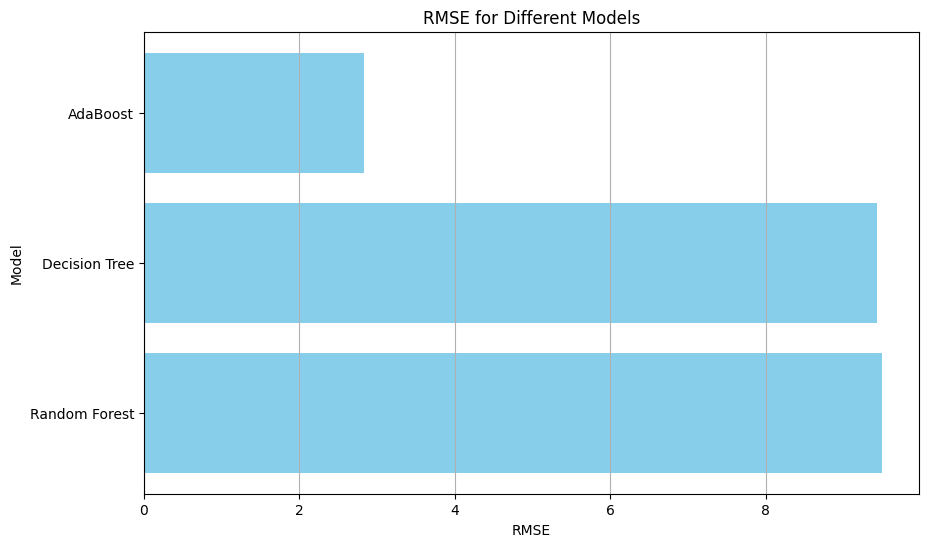

In [20]:
import matplotlib.pyplot as plt

# Sort the DataFrame by RMSE in descending order
df_comp_sorted = df_comp.sort_values(by='RMSE', ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(df_comp_sorted['Model'], df_comp_sorted['RMSE'], color='skyblue')
plt.xlabel('RMSE')
plt.ylabel('Model')
plt.title('RMSE for Different Models')
plt.grid(axis='x')
plt.show()

#### Interpretation and Discussion ####


The models executed above perform as expected. While the RMSE values are relatively low, they still maintain a noticable distance from the ideal zero, indicating room for improvement. Enhancing the dataset by incorporating more recent data beyond the 2000-2015 timeframe could provide valuable insights into identifying the most influential predictors of Life Expectancy. Additionally, addressing missing data in a more refined manner during preprocessing could contribute to further improving the models.

At present, the observed RMSE values do not meet the threshold for deployment, signifying the need for greater precision in predictions, especially in a domain as critical as life expectancy. However, I do believe that these models hold significant potential for future deployment once additional data is acquired. 

Notably, the hyperparameter tuning with Random Search and Grid Search did enhance model performance across the board, effectively minimizing RMSE values. This process not only helps in optimizing model performance, but also mitigates overfitting concerns that are most commonly asssociated with Random Forest and Decision Tree models. 
